1. Setup

In [20]:
!pip install gym_super_mario_bros==7.3.0 nes_py

ERROR: Could not install packages due to an OSError: [WinError 32] Der Prozess kann nicht auf die Datei zugreifen, da sie von einem anderen Prozess verwendet wird: 'C:\\Users\\tobia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\share\\doc\\networkx-3.1\\examples\\3d_drawing\\plot_basic.py'
Check the permissions.



  Obtaining dependency information for stable-baselines3[extra] from https://files.pythonhosted.org/packages/5e/81/7a0fbfc45240ec36cc3fcfe8f135996ef03277e2305d941a6d9186eb14e8/stable_baselines3-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for gymnasium<0.30,>=0.28.1 from https://files.pythonhosted.org/packages/a8/4d/3cbfd81ed84db450dbe73a89afcd8bc405273918415649ac6683356afe92/gymnasium-0.29.1-py3-none-any.whl.metadata
  Using cached torch-2.0.1-cp38-cp38-win_amd64.whl (172.4 MB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/c3/6c/ea362eef61f05553aaf1a24b3e96b2d0603f5dc71a3bd35688a24ed88843/pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a3/d2/4ce53fc825adfb38b97d91aa1bb99df7b10637c0044302807c00cdee3ad5/matplotlib-3.7.3-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.python

ERROR: Could not install packages due to an OSError: [WinError 32] Der Prozess kann nicht auf die Datei zugreifen, da sie von einem anderen Prozess verwendet wird: 'C:\\Users\\tobia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\torchaudio\\backend\\soundfile_backend.py'
Check the permissions.

ERROR: Could not install packages due to an OSError: [WinError 32] Der Prozess kann nicht auf die Datei zugreifen, da sie von einem anderen Prozess verwendet wird: 'C:\\Users\\tobia\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\torchvision\\libjpeg.dll'
Check the permissions.



     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/172.4 MB 1.3 MB/s eta 0:02:15
     -------------------------------------- 0.1/172.4 MB 762.6 kB/s eta 0:03:46
     -------------------------------------- 0.1/172.4 MB 944.1 kB/s eta 0:03:03
     ---------------------------------------- 0.2/172.4 MB 1.3 MB/s eta 0:02:18
     ---------------------------------------- 0.3/172.4 MB 1.2 MB/s eta 0:02:22
     ---------------------------------------- 0.3/172.4 MB 1.2 MB/s eta 0:02:20
     ---------------------------------------- 0.3/172.4 MB 1.2 MB/s eta 0:02:20
     ---------------------------------------- 0.4/172.4 MB 1.0 MB/s eta 0:02:49
     ---------------------------------------- 0.5/172.4 MB 1.1 MB/s eta 0:02:43
     ---------------------------------------- 0.6/172.4 MB 1.2 MB/s eta 0:02:20
     ---------------------------------------- 0.7/172.4 MB 1.2 MB/s eta 0:02:19
     ---------------------------------------- 0

In [1]:
# Spiel importieren
import gym_super_mario_bros
# Joypad wrapper importieren
from nes_py.wrappers import JoypadSpace
# Vereinfachte Kontrolle importieren
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [4]:
from gym_super_mario_bros.actions import COMPLEX_MOVEMENT

In [3]:
##mögliche Tastenkombis
RIGHT_ONLY

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B']]

In [5]:
COMPLEX_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left'],
 ['left', 'A'],
 ['left', 'B'],
 ['left', 'A', 'B'],
 ['down'],
 ['up']]

In [3]:
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [6]:
done = True
for step in range(100000):
# Start the game to begin with
    if done:
        env.reset()
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    done = terminated or truncated
    env.render()
env.close()

KeyboardInterrupt: 

In [8]:
env.close()

ValueError: env has already been closed.

In [7]:
##256 mögliche Tastenkombis für AI (schwer zu lernen)
env.action_space

Discrete(7)

In [4]:
state = env.reset()

In [5]:
env.step(1)[4]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

2. Preprocess Environment

In [19]:
# Install pytorch
!pip install torch torchvision torchaudio

  Using cached torch-2.0.1-cp38-cp38-win_amd64.whl (172.4 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.10.1+cu113
    Uninstalling torch-1.10.1+cu113:
      Successfully uninstalled torch-1.10.1+cu113


ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\tobia\\AppData\\Local\\Temp\\pip-uninstall-9gtg_uqi\\_c.cp38-win_amd64.pyd'
Check the permissions.



In [38]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra]

In [4]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [6]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [8]:
state = env.reset()

In [22]:
state, reward, done, info = env.step([5])

In [9]:
state.shape

(1, 240, 256, 4)

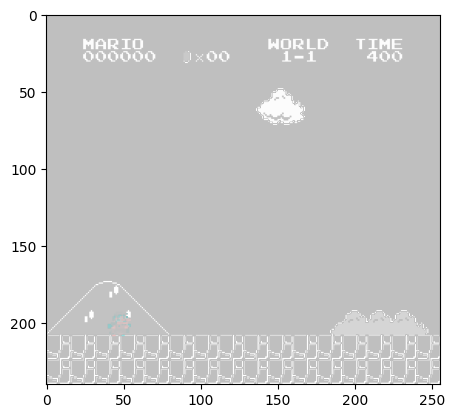

In [23]:
plt.imshow(state[0])

In [30]:
state, reward, done, info = env.step([5])

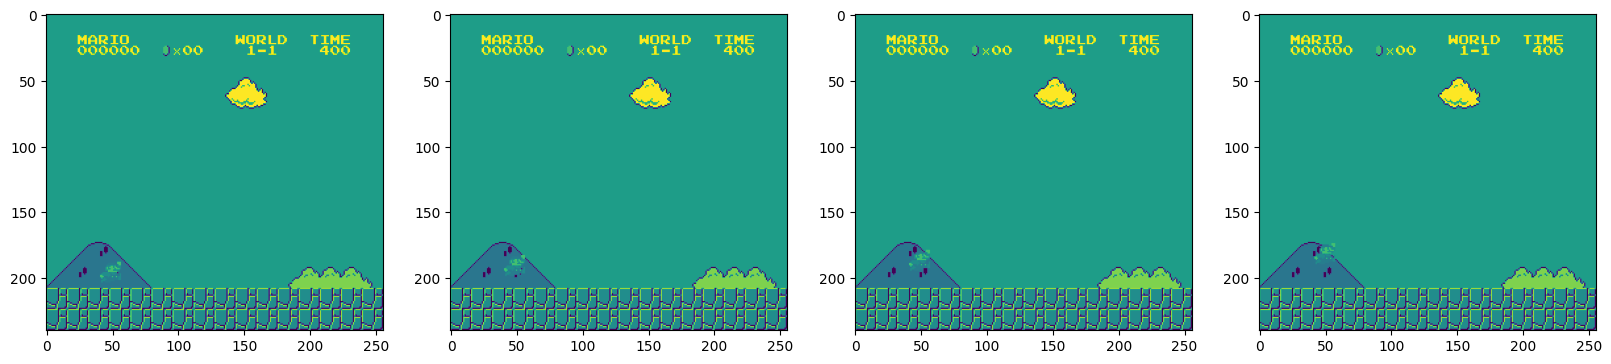

In [31]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

2. Preprocess Environment

In [9]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
from stable_baselines3 import A2C
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [25]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [26]:
CHECKPOINT_DIR = './train1/'
LOG_DIR = './logs1/'

In [27]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [11]:
# This is the AI model started
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512)   

######MlpPolicy für anderes Vorgehen!!!!######

Using cpu device
Wrapping the env in a VecTransposeImage.


In [28]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=10000, callback=callback)

Logging to ./logs1/PPO_1


C:\Users\tobia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
C:\Users\tobia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 73  |
|    iterations      | 1   |
|    time_elapsed    | 6   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 25            |
|    iterations           | 2             |
|    time_elapsed         | 40            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.0522781e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00673       |
|    learning_rate        | 1e-06         |
|    loss                 | 237           |
|    n_updates            | 10            |
|    policy_gradient_loss | -5.48e-05     |
|    value_loss           | 474           |
-------------------------------------------
-----

In [29]:
model.save('mlpmodel')

Testing

In [3]:
# Load model
model = PPO.load('./train1/best_model_10000')

In [10]:
model = A2C.load('./train2/best_model_5000000')

In [17]:
state = env.reset()


In [19]:
env.close()

In [20]:
env.observation_space = (3, 240, 256)

In [21]:
state = env.reset()

while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

OSError: exception: access violation reading 0x000000000003C200

In [32]:
env.close()